In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\hgh\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
my_data=pd.read_csv("Admission_Predict.csv")
my_data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
my_data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
my_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

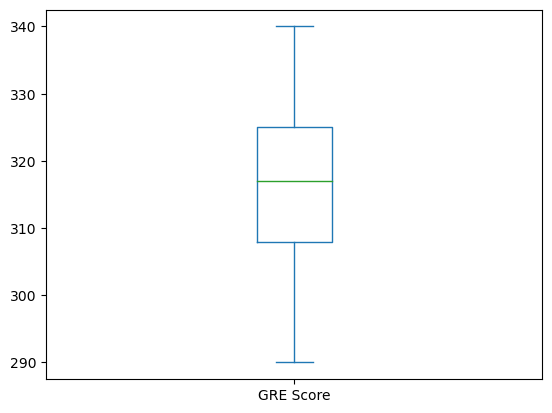

In [5]:
my_data["GRE Score"].plot.box()

In [6]:
import matplotlib.pyplot as plt

In [7]:
my_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
def box_plot(col):
    plt.figure()
    my_data[col].plot(kind="box")
    plt.title(f"box plot of {col}")
    plt.ylabel("Vales")
    plt.grid(True)
    plt.tight_layout()

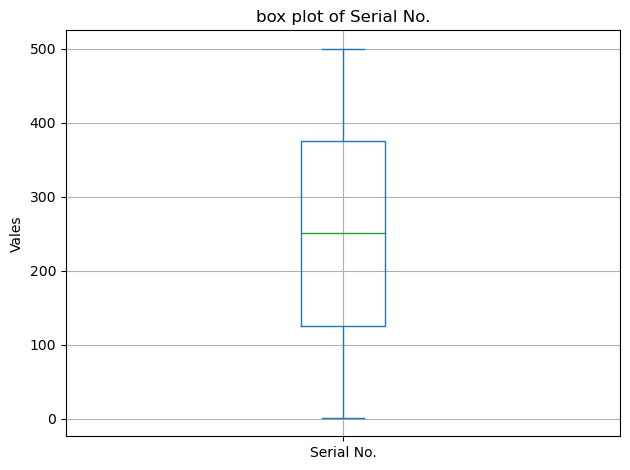

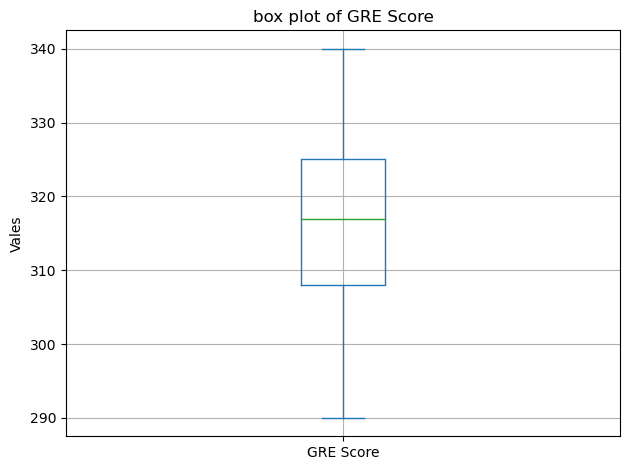

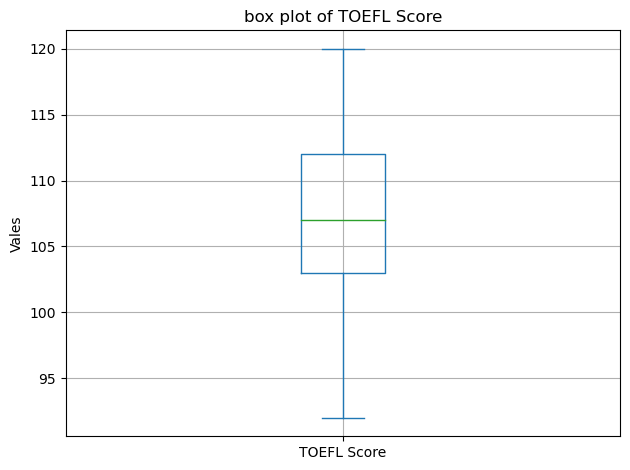

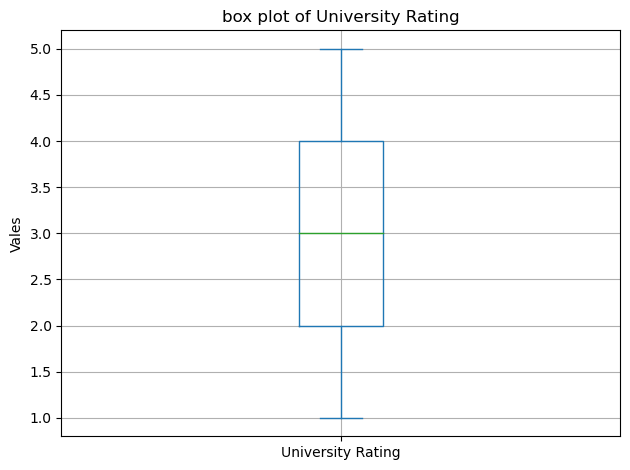

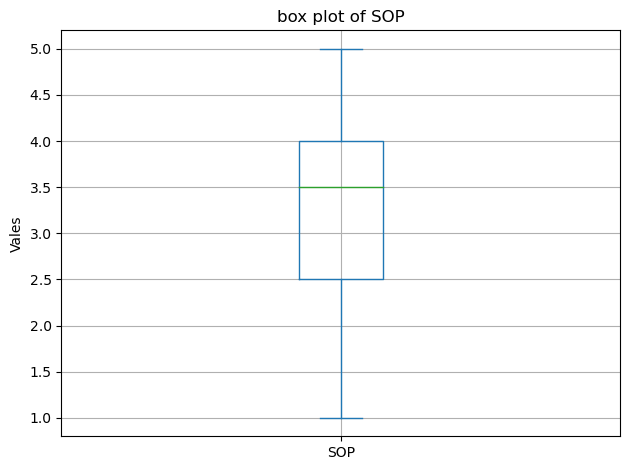

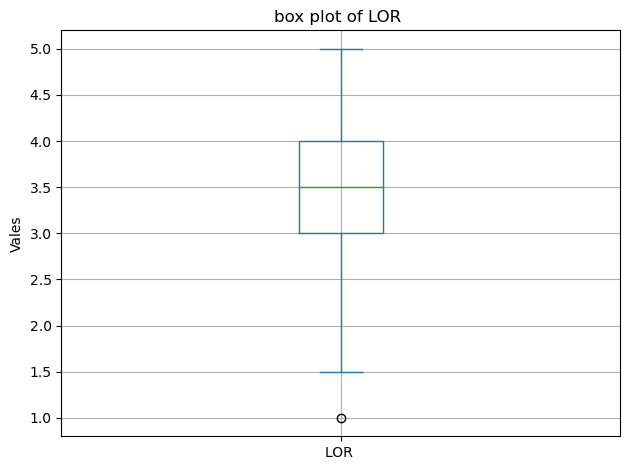

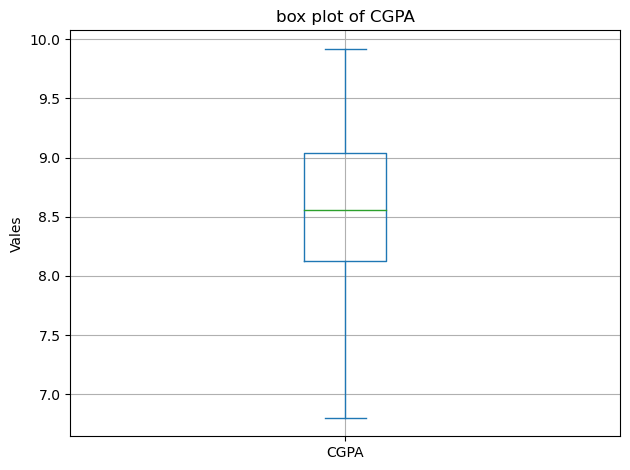

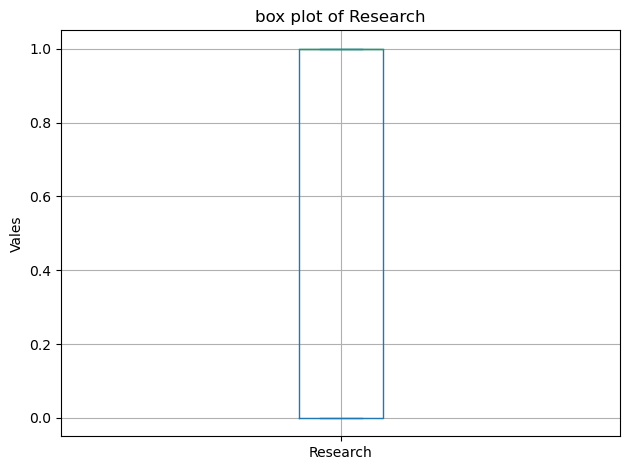

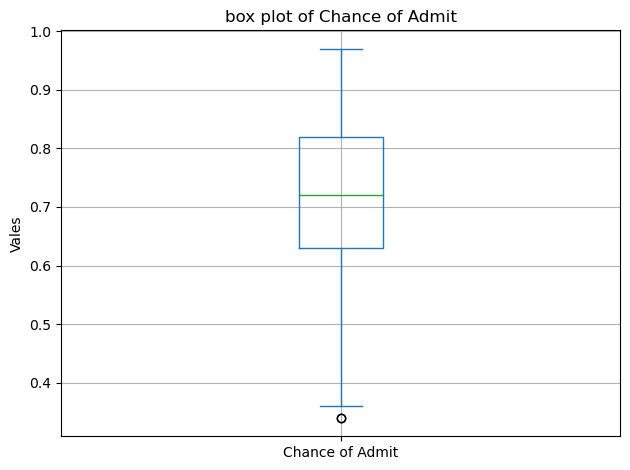

In [9]:
for col in my_data.columns:
    box_plot(col)

<Axes: xlabel='University Rating'>

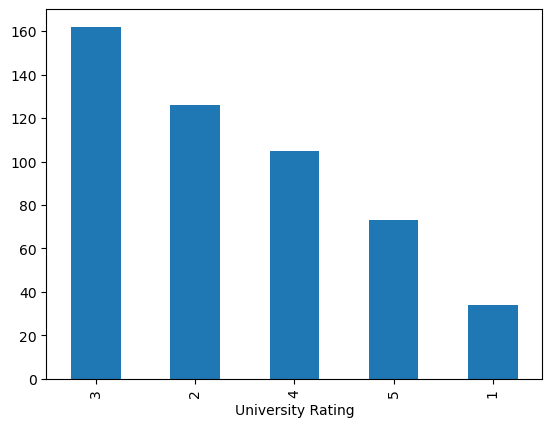

In [10]:
my_data["University Rating"].value_counts().plot(kind="bar")

In [11]:
my_data.columns 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
def bar_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="bar",rot=90)
    plt.title(f"bar plot of {col}")
    plt.xticks(fontsize=10)
    plt.ylabel("Vales")
    plt.grid(True)
    plt.tight_layout()

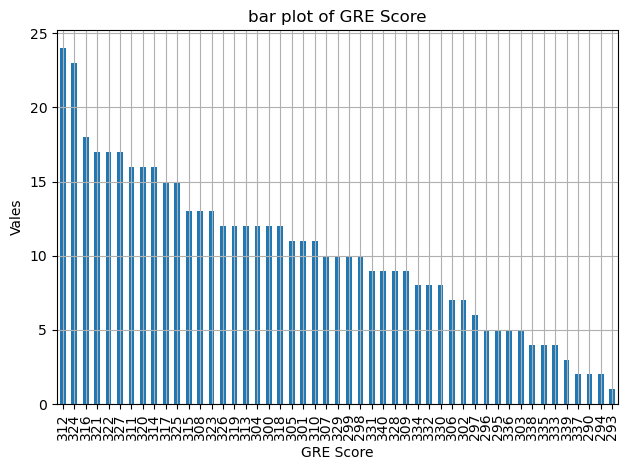

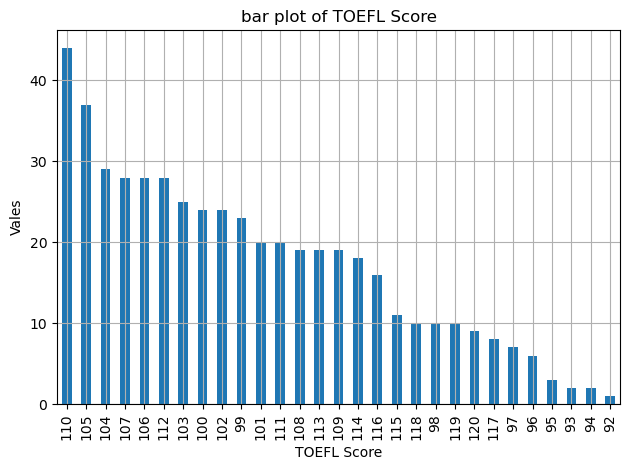

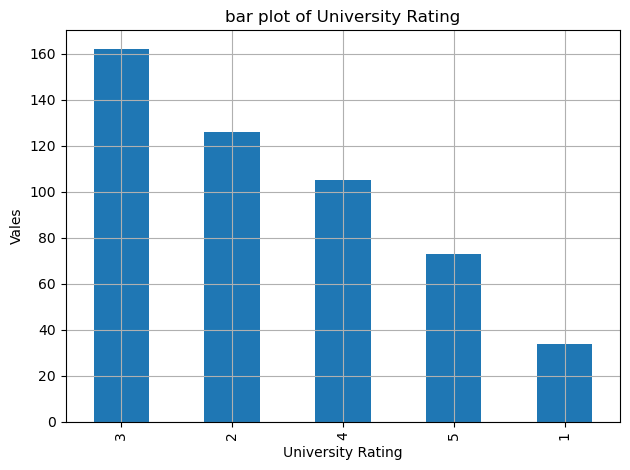

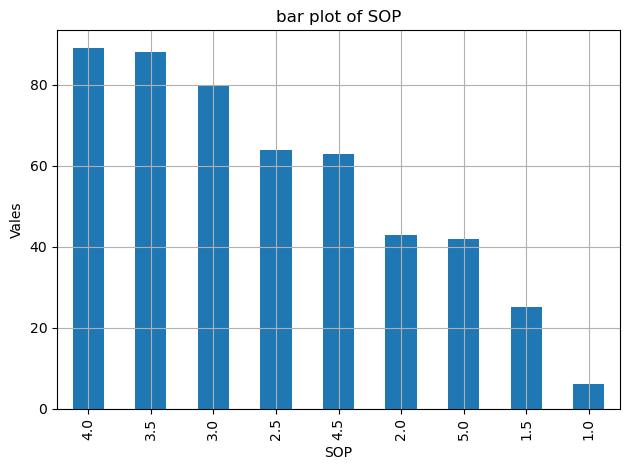

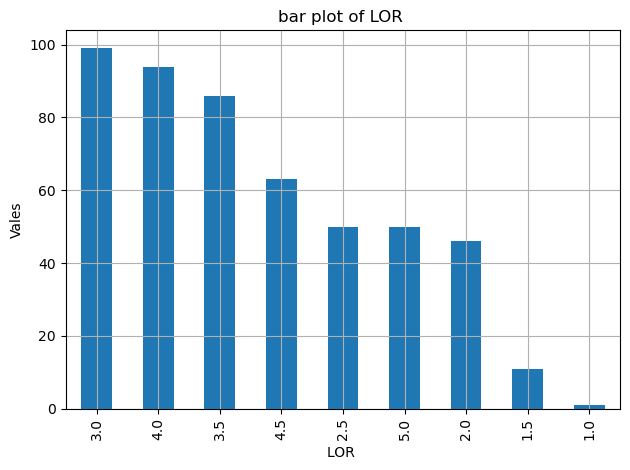

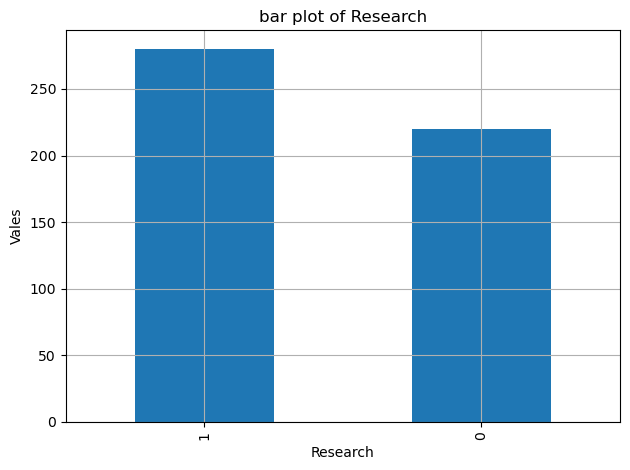

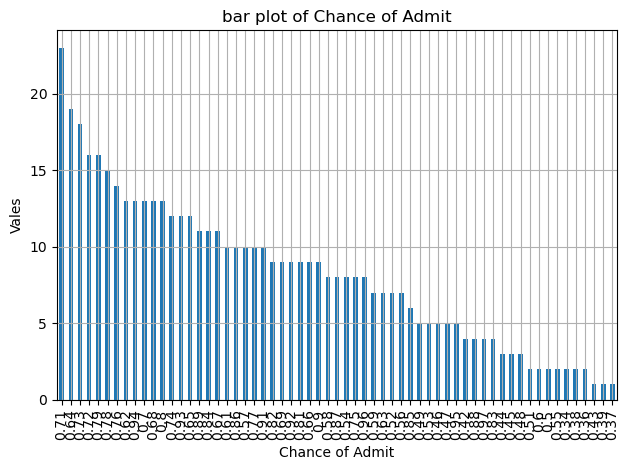

In [13]:
for col in[ 'GRE Score','TOEFL Score','University Rating','SOP','LOR ','Research','Chance of Admit']:
    bar_plot(col)

In [14]:
def line_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="line")
    plt.title(f"line plot of {col}")
    plt.xticks(fontsize=10)
    plt.ylabel("Vales")
    plt.grid(True)
    plt.tight_layout()

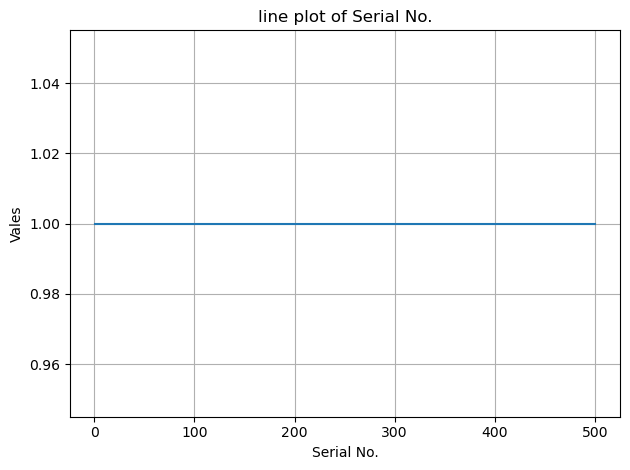

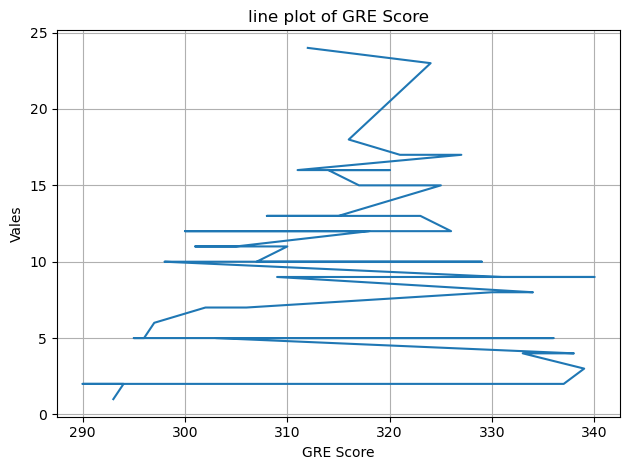

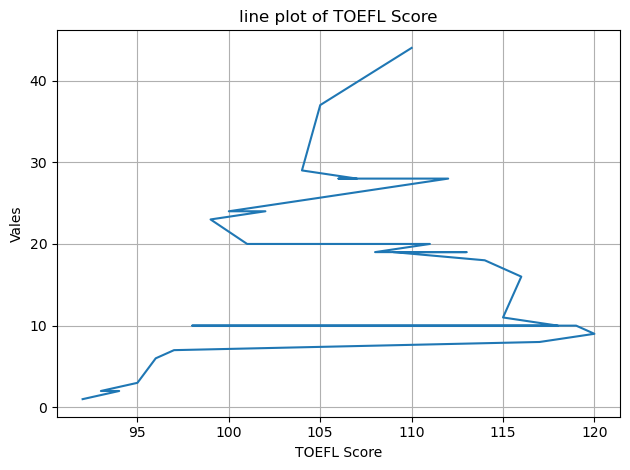

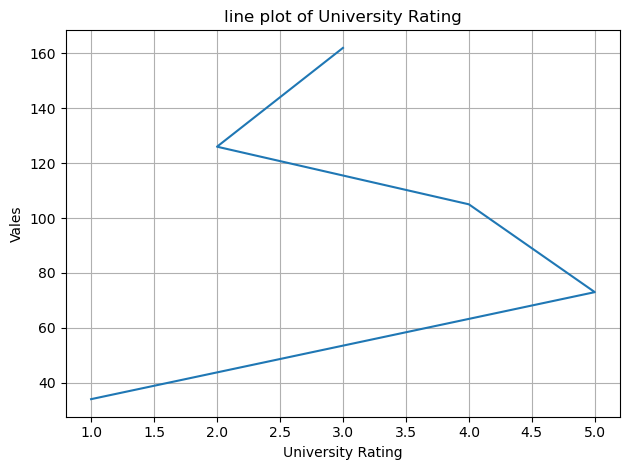

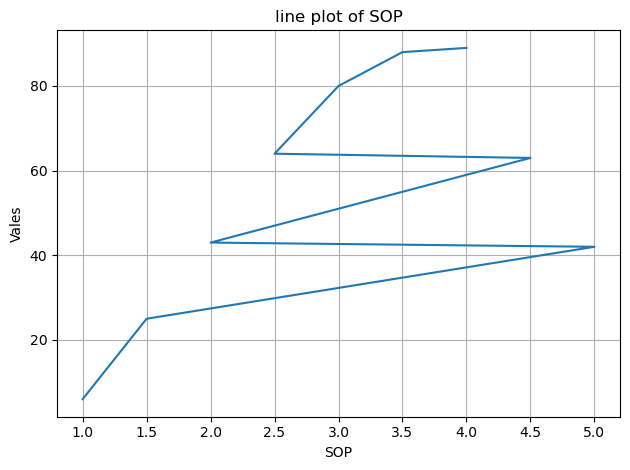

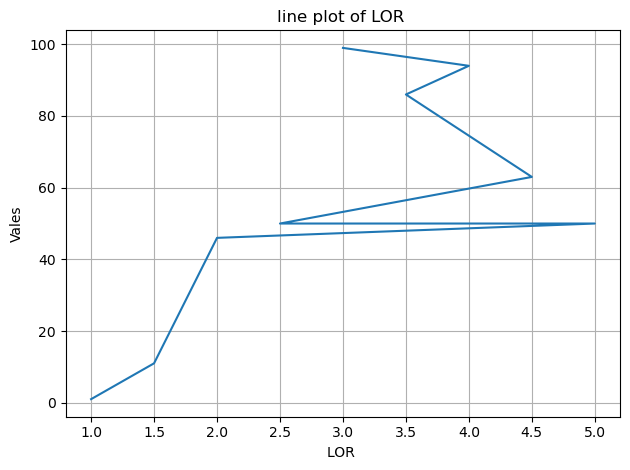

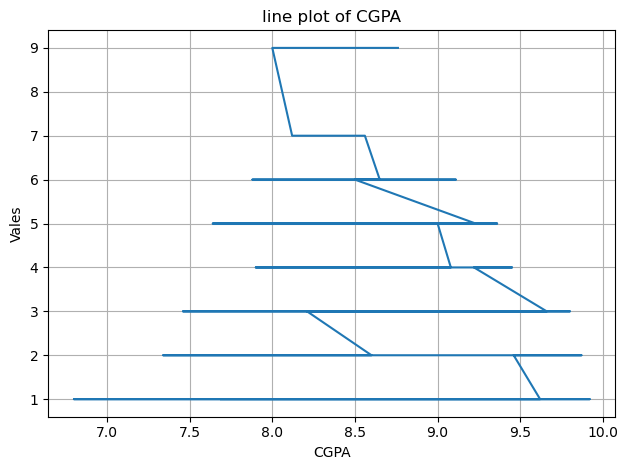

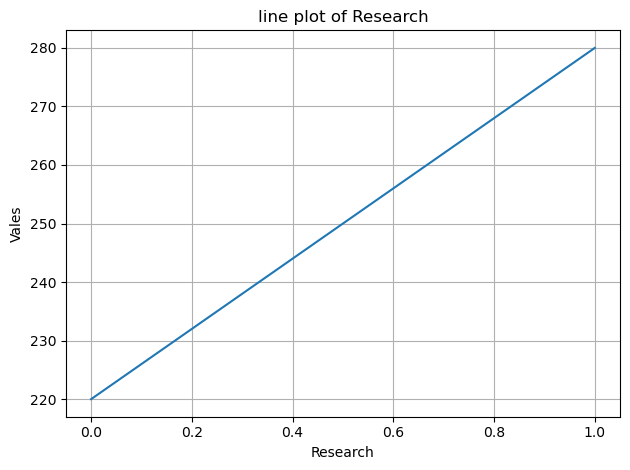

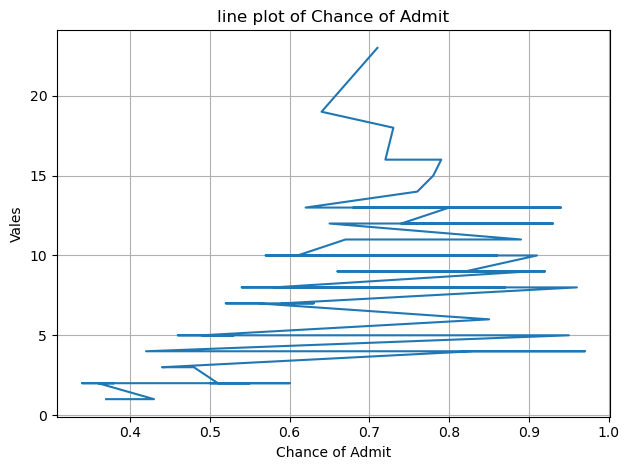

In [15]:
for col in my_data.columns:
    line_plot(col)            

In [16]:
y=my_data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [17]:
x=my_data.drop(["Chance of Admit","Serial No."],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

x_train (350, 7)
x_test (150, 7)
y_train (350,)
y_test (150,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [22]:
#train model
model_lr.fit(x_train,y_train)


LinearRegression()

In [23]:
y_pred=model_lr.predict(x_test)
y_pred

array([0.65280328, 0.70945113, 0.93670057, 0.73146137, 0.81803279,
       0.66920636, 0.74796312, 0.71437662, 0.79220523, 0.66014296,
       0.66818041, 0.57365165, 0.79048746, 0.79275362, 0.77460648,
       0.85998859, 0.62886953, 0.75414155, 0.90227196, 0.67503422,
       0.62439904, 0.79448136, 0.83891151, 0.61190399, 0.78749169,
       0.57607235, 0.94963666, 0.64733575, 0.8623322 , 0.71522672,
       0.63363523, 0.81333335, 0.59677901, 0.90897556, 0.51109914,
       0.81966876, 0.67915838, 0.63348767, 0.65567508, 0.91162667,
       0.57351247, 0.66678197, 0.77751227, 0.96973634, 0.77804167,
       0.52364615, 0.65776846, 0.62852765, 0.66699699, 0.65395225,
       0.83381271, 0.91740807, 0.8826517 , 0.63003308, 0.75486868,
       0.65064233, 0.75191415, 0.60692357, 0.66696528, 0.70579381,
       0.44508726, 0.71440199, 0.74788172, 0.85051786, 0.97645415,
       0.61189214, 0.73736489, 0.78395854, 0.93164097, 0.70314242,
       0.60482269, 0.65415503, 0.82887293, 0.50120221, 0.92751

In [24]:
model_lr.predict([[120,56,78,45,34,65,75]])

C:\Users\hgh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.46740006])

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
mse=mean_squared_error(y_test,y_pred)
print(f"Mean squared error is {mse}")
rmse=sqrt(mse)
print(f"Root mean squared error is {rmse}")

Mean squared error is 0.004125934236707794
Root mean squared error is 0.06423343550447691


In [27]:
from sklearn.metrics import r2_score

In [28]:
r_squared=r2_score(y_test,y_pred)
print(f"R squared is {r_squared}")

R squared is 0.8157672116057981


In [29]:
print(f"Constant value is {model_lr.intercept_}")

Constant value is -1.2161131174465925


In [30]:
print(f"slope m1,m2 and m3 {model_lr.coef_}")

slope m1,m2 and m3 [ 0.00165342  0.00381453  0.01012349 -0.00100952  0.01351732  0.10703419
  0.02813965]


In [31]:
import pickle
pickle.dump(model_lr,open("model_lr.pkl","wb"))

In [32]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn. metrics import r2_score


In [33]:
select_model=[LinearRegression(),
             DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
             RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

In [36]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_model:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Square value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("---------")
    print(f"List of r Square {my_r_square}")
    adj_r_sqaured_test= 1 -(1- r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r_sqaured_test")
    adj_r2_square_value.append(adj_r_sqaured_test)
    print(f"Adjusted R Square{adj_r2_square_value} of model {model}")
    print("---------")
    print(f"Adjusted R Square {adj_r2_square_value}")

RMSE value [0.06423343550447691] and R Square value [0.74897177061828] of model LinearRegression()
List of Rmse [0.06423343550447691]
---------
List of r Square [0.74897177061828]
LinearRegression(),adj_r_sqaured_test
Adjusted R Square[0.7365971395924206] of model LinearRegression()
---------
Adjusted R Square [0.7365971395924206]
RMSE value [0.06423343550447691, 0.0885798447102324] and R Square value [0.74897177061828, 0.5836090622737778] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06423343550447691, 0.0885798447102324]
---------
List of r Square [0.74897177061828, 0.5836090622737778]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r_sqaured_test
Adjusted R Square[0.7365971395924206, 0.5630827484422035] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
---------
Adjusted R Square [0.7365971395924206, 0.5630827484422035]
RMSE value [0.06423343550447691, 0.0885798447102324, 0.06987576503977758] and R Sq

In [39]:
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.06423343550447691, 0.0885798447102324, 0.06987576503977758],
 [0.74897177061828, 0.5836090622737778, 0.6925720139513588],
 [0.7365971395924206, 0.5630827484422035, 0.6774171132306512]]

In [47]:
a=pd.DataFrame(data=result,columns=["LR","DTC","RF"],index=["my_rmse","my_r_square","adj_r2_square_value"])

Text(0, 0.5, 'Values')

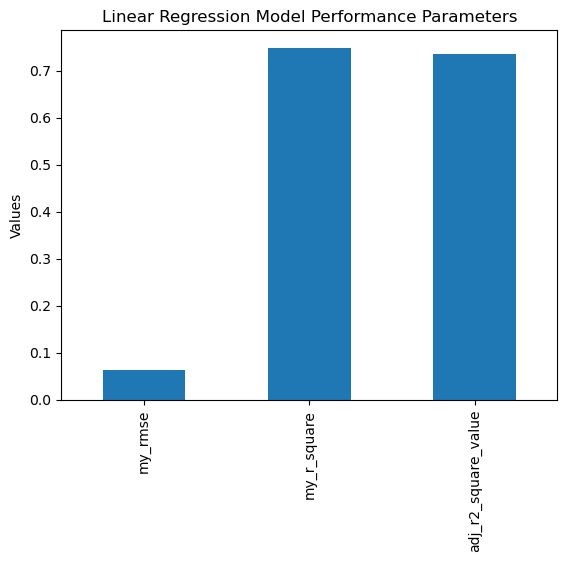

In [48]:
a.LR.plot(kind="bar")
plt.title("Linear Regression Model Performance Parameters")
plt.ylabel("Values")

Text(0, 0.5, 'Values')

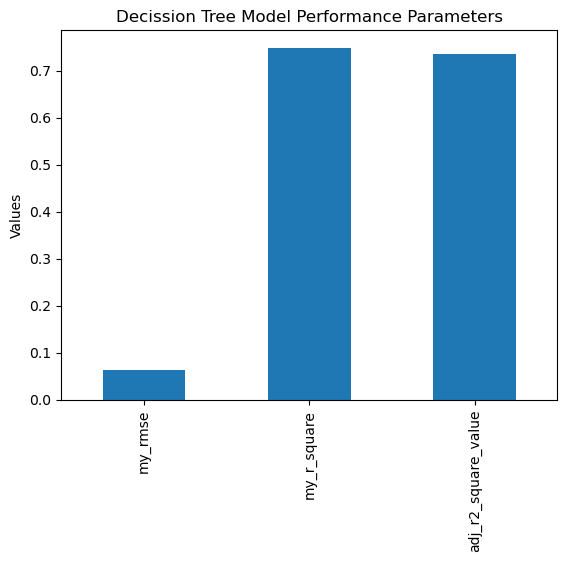

In [49]:
a.LR.plot(kind="bar")
plt.title("Decission Tree Model Performance Parameters")
plt.ylabel("Values")

Text(0, 0.5, 'Values')

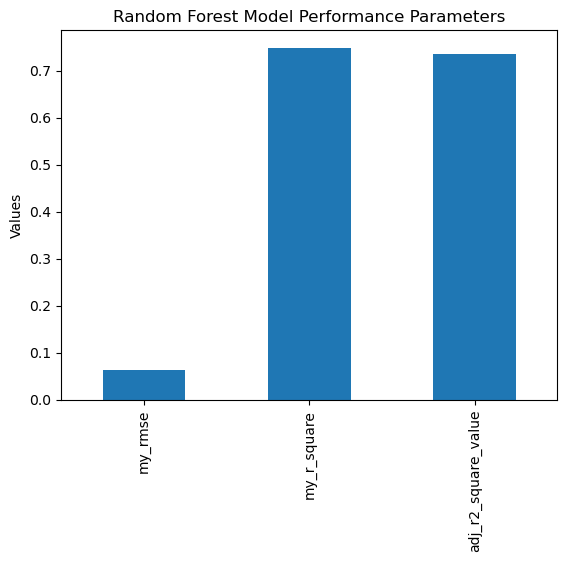

In [50]:
a.LR.plot(kind="bar")
plt.title("Random Forest Model Performance Parameters")
plt.ylabel("Values")

In [51]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f'Model performance Graph {col}')
    plt.ylabel('Values')
    plt.grid(True)
    plt.tight_layout()

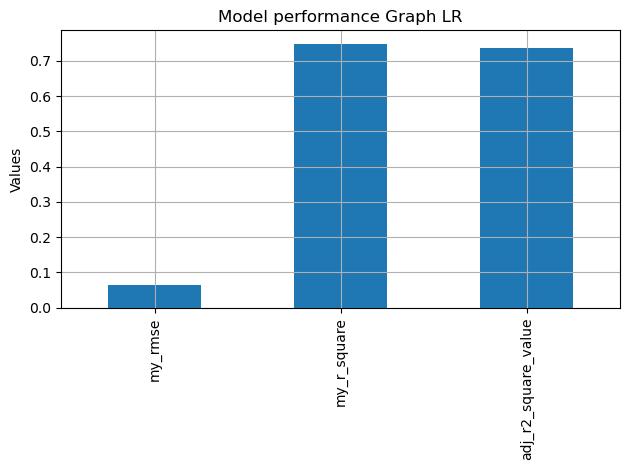

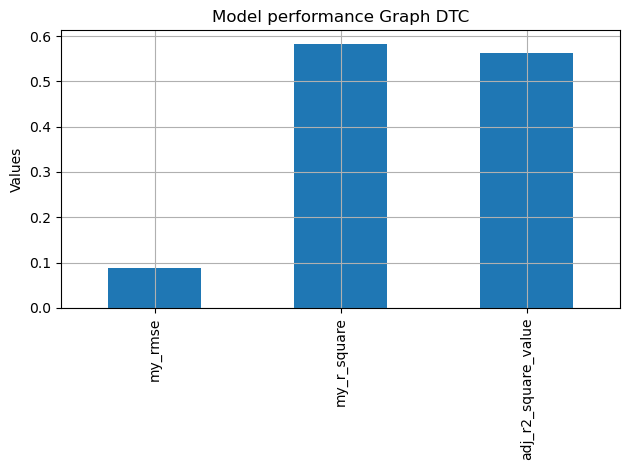

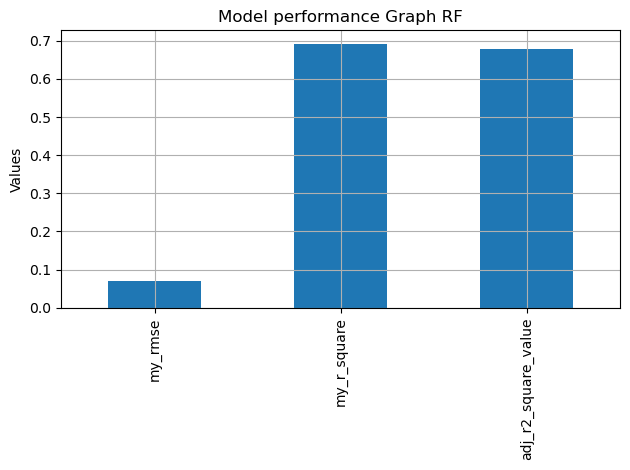

In [52]:
for col in a.columns:
    my_model_plot(col)